# Mini Project - Job Salaries Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import collections
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime, timedelta
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter


from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, cross_validate

In [2]:
dsdata = pd.read_csv('new_ds_salaries.csv')
ds_new = dsdata.copy()

# Exploring the numeric data in hr_data
ds_num = ds_new.select_dtypes(['int64', 'float64']).copy()
ds_num.head()


,work_year,salary,salary_in_usd,remote_ratio,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
0,2020,70000,79833,0,1,2,1,0,0
1,2020,260000,260000,0,2,0,1,1,1
2,2020,85000,109024,1,2,1,1,0,0
3,2020,20000,20000,0,1,0,1,2,2
4,2020,150000,150000,1,2,2,1,2,2


## 1. Decision Tree Regressor

### 1.1 Define Model Inputs (X) & Output (y)

In [3]:
X = ds_num.drop(['salary_in_usd', 'work_year', 'salary'], axis=1)
y = ds_num['salary_in_usd']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 1.2 Create Decision Tree Regressor Model

In [5]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=40, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=40, random_state=2)

### 1.3 Evaluating Decision Tree Regressor Model

In [6]:
# Training MSE
train_mse = sqrt(mean_squared_error(tree_reg.predict(X_train), y_train))
print('Training Root Mean Squared Error is: ', train_mse)

# Testing mse
test_mse = sqrt(mean_squared_error(tree_reg.predict(X_test), y_test))
print('Testing Root Mean Squared Error is: ',test_mse)

Training Root Mean Squared Error is:  46043.174130143605
Testing Root Mean Squared Error is:  58347.6096446681


In [7]:
train_R2 = tree_reg.score(X_train, y_train)
print('Training R^2 value is: ', train_R2)
test_R2 = tree_reg.score(X_test, y_test)
print('Testing R^2 value is: ', test_R2)

Training R^2 value is:  0.606862069809205
Testing R^2 value is:  0.18519796612680894


### 1.4 Check using K-Fold Cross Validation to see if it will improve accuracy

In [8]:
results = cross_validate(tree_reg, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Training Score: ', results['train_score'])
print('Testing Score: ', results['test_score'])

Training Score:  [-1.61347460e+09 -2.07775009e+09 -2.09089211e+09 -2.10753548e+09
 -1.95745419e+09]
Testing Score:  [-5.88837912e+09 -4.47621720e+09 -2.68939630e+09 -3.07390298e+09
 -3.12131747e+09]


In [9]:
print('Cross Validation Training Root MSE is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing Root MSE is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))

Cross Validation Training Root MSE is: 44378.16235535028
Cross Validation Testing Root MSE is: 62047.099966221744


### 1.5 Improving Decision Tree Regressor Model

#### Using Gridsearch to improve on the model
- Finding the best Hyperparameters to select on modelling

In [10]:
param_grid = { "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                 "min_samples_leaf" : [15,20,25,35],
                 "min_samples_split" : [16,22,26,29],
                 'max_depth' : [40,45,50,55]}
gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

-3102128028.58451
{'criterion': 'poisson', 'max_depth': 40, 'min_samples_leaf': 15, 'min_samples_split': 16}


### 1.6 Create New Decision Tree Regressor Model with new Hyperparameters

In [11]:
tree_reg_new = tree.DecisionTreeRegressor(criterion='poisson', max_depth = 40, min_samples_leaf = 15, min_samples_split=16)
tree_reg_new.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=40, min_samples_leaf=15,
                      min_samples_split=16)

### 1.7 Evaluating model based on newly improved model with hyperparameters

In [12]:
#training mse
new_train_mse = sqrt(mean_squared_error(tree_reg_new.predict(X_train), y_train))
print('Training Root Mean Squared Error is: ', train_mse)
#testing mse
new_test_mse = sqrt(mean_squared_error(tree_reg_new.predict(X_test), y_test))
print('Testing Root Mean Squared Error is: ', test_mse)

Training Root Mean Squared Error is:  46043.174130143605
Testing Root Mean Squared Error is:  58347.6096446681


In [13]:
train_R2_new = tree_reg_new.score(X_train, y_train)
print('Training R^2 value is: ', train_R2_new)
test_R2_new = tree_reg_new.score(X_test, y_test)
print('Testing R^2 value is: ', test_R2_new)

Training R^2 value is:  0.3972164267578737
Testing R^2 value is:  0.50108403633547


### 1.8 Check whether using K-fold Cross Validation will further improve the accuracy on the new Decision Tree Regressor Model

In [14]:
# Evaluate the Model using K-folds Cross validation
new_results = cross_validate(tree_reg_new, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('train_score: ', new_results['train_score'])
print('test_score: ', new_results['test_score'])

train_score:  [-2.47218656e+09 -2.90087424e+09 -2.88048434e+09 -3.08784238e+09
 -2.73538085e+09]
test_score:  [-4.17322674e+09 -3.95547985e+09 -2.77642848e+09 -2.19064834e+09
 -2.89470170e+09]


In [15]:
print('cross validation training root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('cross validation testing  root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))

cross validation training root mean_squared_error is: 53059.90646587468
cross validation testing  root mean_squared_error is: 56551.71988361068


### 1.9 Overview of Model

In [16]:
print("**Current Decision Tree Regressor Model**")
print()
print("RMSE Scores")
print("---Before---")
print('Training Root Mean Squared Error is: ', train_mse)
print('Testing Root Mean Squared Error is: ', test_mse)
print('Cross Validation Training Root mean_squared_error is:', sqrt(sum(-results['train_score'])/len(results['train_score'])))
print('Cross Validation Testing Root mean_squared_error is:', sqrt(sum(-results['test_score'])/len(results['test_score'])))
print()
print("---After---")
print('Training Root Mean Squared Error is: ', new_train_mse)
print('Testing Root Mean Squared Error is: ', new_test_mse)
print('Cross Validation Training Root mean_squared_error is:', sqrt(sum(-new_results['train_score'])/len(new_results['train_score'])))
print('Cross Validation Testing Root mean_squared_error is:', sqrt(sum(-new_results['test_score'])/len(new_results['test_score'])))
print()
print("Accuracy")
print("---Before---")

print('training R^2 value is: ', train_R2)
print('testing R^2 value is: ', test_R2)
print()
print("---After---")
print('training R^2 value is: ', train_R2_new)
print('testing R^2 value is: ', test_R2_new)

**Current Decision Tree Regressor Model**

RMSE Scores
---Before---
Training Root Mean Squared Error is:  46043.174130143605
Testing Root Mean Squared Error is:  58347.6096446681
Cross Validation Training Root mean_squared_error is: 44378.16235535028
Cross Validation Testing Root mean_squared_error is: 62047.099966221744

---After---
Training Root Mean Squared Error is:  57012.94648250877
Testing Root Mean Squared Error is:  45657.35164886388
Cross Validation Training Root mean_squared_error is: 53059.90646587468
Cross Validation Testing Root mean_squared_error is: 56551.71988361068

Accuracy
---Before---
training R^2 value is:  0.606862069809205
testing R^2 value is:  0.18519796612680894

---After---
training R^2 value is:  0.3972164267578737
testing R^2 value is:  0.50108403633547


After applying the best hyperparameters and refitting the Decision Tree Regressor Model again

We can see that the training model and the testing model from before and after have changed drastically
The RMSE have decreased from before and after hyperparameters have been selected
However, after applying cross validation, the RMSE of training are testing models are more closely matched as compared to before.

The R^2 training and testing values have greatly improved after applying gridsearch and cross validation

However, the model can still be further improved by finding out the importance of features and dropping insignificant ones near the bottom of the tree

### 1.10 Using Feature Importance to determine important data features

In [17]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['feature']), 
           pd.DataFrame(tree_reg_new.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,feature,importance
4,employee_continentN,0.728805
1,experience_levelN,0.193035
2,company_sizeN,0.038845
0,remote_ratio,0.019966
5,company_continentN,0.019350
3,employment_typeN,0.000000


- Thinking to drop the unimportant columns, but will be left with one or two columns to be used on the model

## linear regression

In [14]:
df=dsdata[["employment_type", "employee_continent", "company_continent", "domain", "job_type","remote_ratio","experience_level","company_size","salary_in_usd"]]
df.head()

,employment_type,employee_continent,company_continent,domain,job_type,remote_ratio,experience_level,company_size,salary_in_usd
0,FT,EUROPE,EUROPE,Data science,Scientist,0,MI,L,79833
1,FT,ASIA,ASIA,Machine Learning,Scientist,0,SE,S,260000
2,FT,EUROPE,EUROPE,Data science,Engineer,1,SE,M,109024
3,FT,NORTH AMERICA,NORTH AMERICA,Data science,Analyst,0,MI,S,20000
4,FT,NORTH AMERICA,NORTH AMERICA,Machine Learning,Engineer,1,SE,L,150000


In [22]:

# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=["employment_type", "employee_continent", "company_continent", "domain", "job_type"])

# Integer Encoding
df_encoded["remote_ratio"] = df_encoded["remote_ratio"].replace({0:0, 1:1, 2:2})
df_encoded["experience_level"] = df_encoded["experience_level"].replace({"EN":0, "MI":1, "SE":2, "EX":3})
df_encoded["company_size"] = df_encoded["company_size"].replace({"S":0, "M":1, "L":2})

df_encoded.head()


,remote_ratio,experience_level,company_size,salary_in_usd,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,employee_continent_AFRICA,employee_continent_ASIA,...,domain_Management,domain_NLP,domain_Unknown,job_type_Analyst,job_type_Consultant,job_type_Developer,job_type_Engineer,job_type_Head,job_type_Manager,job_type_Scientist
0,0,1,2,79833,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,0,260000,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2,1,109024,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,20000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,2,150000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_encoded.drop("salary_in_usd", axis=1)
y = df_encoded["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
model_lg = LinearRegression()
model_lg.fit(X_train, y_train)


LinearRegression()

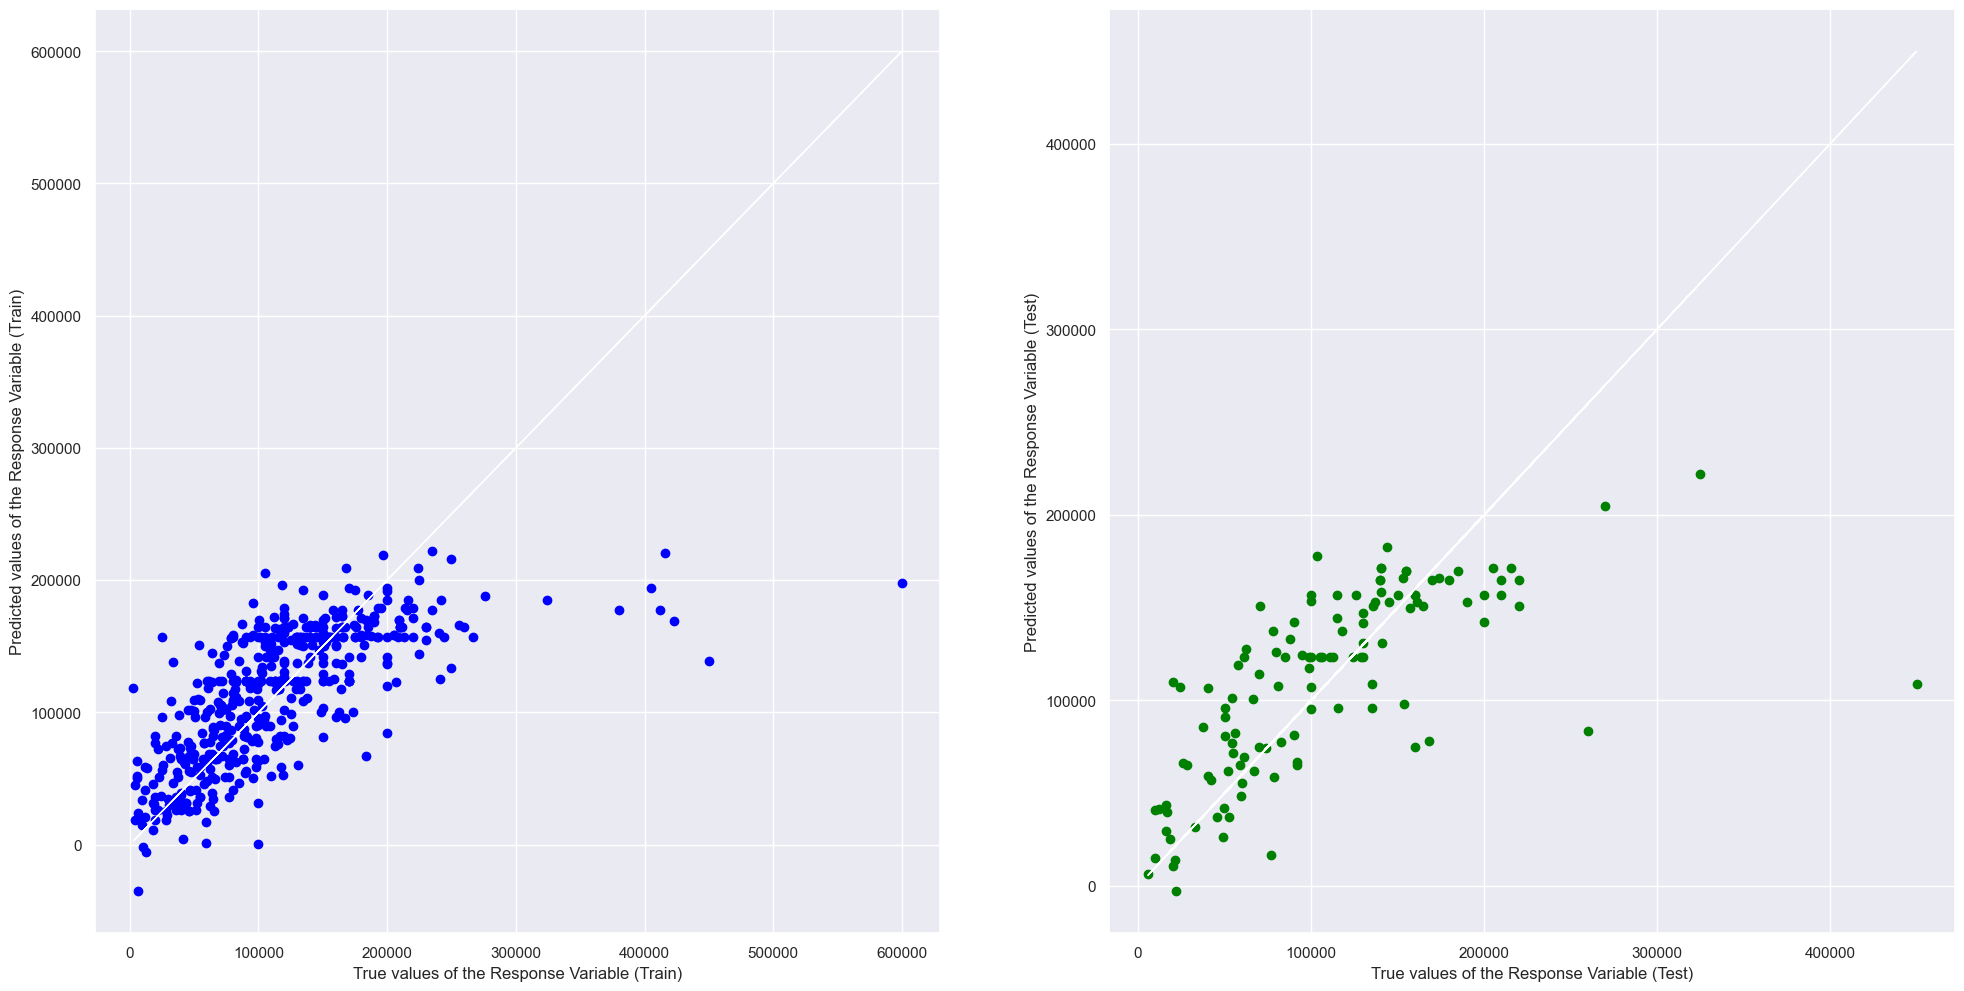

In [24]:

y_train_pred = model_lg.predict(X_train)
y_test_pred = model_lg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_lg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4848427242022355
Mean Squared Error (MSE) 	: 2613816395.496907

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 2549347429.3688526

